# Web Scraping FashionUnited Top 100 Index  #

In [155]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL de la page FashionUnited Top 100
url = "https://fashionunited.com/i/top100"

# En-têtes pour simuler un vrai navigateur
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
}

# Récupération du HTML de la page
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Trouver le tableau
table = soup.find("table")

# Extraction des données du tableau
data = []
for row in table.find_all("tr"):
    columns = row.find_all("td")
    data.append([col.text.strip() for col in columns])

# Convertir en DataFrame pandas
df = pd.DataFrame(data, columns=["#", "Country", "Name", "Market Cap"])
df = df.dropna()  # Supprimer les lignes vides

# Sauvegarde en CSV
df.to_csv("fashionunited_top100.csv", index=False)
print(df.head())  # Afficher les premières lignes


   # Country           Name Market Cap
1  1      FR           LVMH    $321.6B
2  2      FR         Hermès    $240.7B
3  3      ES        Inditex      $177B
4  4      US  TJX Companies    $142.3B
5  5      US           Nike    $117.7B


In [156]:
from function_file import first_analysis
first_analysis(df)

,#,Country,Name,Market Cap
1,1,FR,LVMH,$321.6B
2,2,FR,Hermès,$240.7B
3,3,ES,Inditex,$177B
4,4,US,TJX Companies,$142.3B
5,5,US,Nike,$117.7B


Index(['#', 'Country', 'Name', 'Market Cap'], dtype='object')

'shape: (100, 4)'

#             object
Country       object
Name          object
Market Cap    object
dtype: object

Looking for null values: 
#             0
Country       0
Name          0
Market Cap    0
dtype: int64


In [157]:
df_top100 = df 

Formatting

In [158]:
df_top100.describe()

,#,Country,Name,Market Cap
count,100,100,100,100
unique,100,16,100,93
top,1,US,LVMH,$3.3B
freq,1,60,1,2


In [159]:
pip install pycountry


In [160]:
# remplacer les codes dans 'Country' avec les vrais noms de pays 

def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except AttributeError:
        return code  # Garde le code si non trouvé
    



In [161]:
import pycountry

# Application de la fonction
df_top100["Country"] = df_top100["Country"].apply(get_country_name)

# Affichage du DataFrame modifié
print(df_top100)


       #        Country                  Name Market Cap
1      1         France                  LVMH    $321.6B
2      2         France                Hermès    $240.7B
3      3          Spain               Inditex      $177B
4      4  United States         TJX Companies    $142.3B
5      5  United States                  Nike    $117.7B
..   ...            ...                   ...        ...
96    96        Germany  Global Fashion Group     $57.6M
97    97      Hong Kong       Esprit Holdings     $48.9M
98    98  United States       Rent the Runway     $46.5M
99    99        Austria               Wolford     $26.1M
100  100  United States           BEBE Stores     $13.9M

[100 rows x 4 columns]


In [162]:
#formatting col names
df_top100.columns= df_top100.columns.str.lower()

In [163]:
#renaming
df_top100 = df_top100.rename(columns={'#': 'position','name':'company_name','market_cap':'capitalization_billion_dol'})


In [165]:
df_top100

,position,country,company_name,market cap
1,1,France,LVMH,$321.6B
2,2,France,Hermès,$240.7B
3,3,Spain,Inditex,$177B
4,4,United States,TJX Companies,$142.3B
5,5,United States,Nike,$117.7B
...,...,...,...,...
96,96,Germany,Global Fashion Group,$57.6M
97,97,Hong Kong,Esprit Holdings,$48.9M
98,98,United States,Rent the Runway,$46.5M
99,99,Austria,Wolford,$26.1M


In [167]:
# Harmonisation de l'unité :'B' and 'M' in ['capitalization_billion_dol']

# Fonction de conversion
def convert_to_billion(value):
    value = value.replace('$', '')  # Supprime le symbole dollar
    if 'B' in value:
        return float(value.replace('B', ''))  # Garde tel quel en billion
    elif 'M' in value:
        return float(value.replace('M', '')) / 1000  # Convertit les millions en billions
    return None  # Gérer les cas imprévus



In [168]:
# Appliquer la conversion et renommer la colonne
df_top100['capitalization_billion_dol'] = df_top100['market cap'].apply(convert_to_billion)

# Supprimer l'ancienne colonne
df_top100 = df_top100.drop(columns=['market cap'])

df_top100 .tail(7)


,position,country,company_name,capitalization_billion_dol
94,94,United States,Cato Fashion,0.0651
95,95,United States,Allbirds,0.0646
96,96,Germany,Global Fashion Group,0.0576
97,97,Hong Kong,Esprit Holdings,0.0489
98,98,United States,Rent the Runway,0.0465
99,99,Austria,Wolford,0.0261
100,100,United States,BEBE Stores,0.0139


In [169]:
#object to numerical

df_top100['capitalization_billion_dol'] = df_top100['capitalization_billion_dol'].astype(float)

In [124]:
df.tail(7)

,#,country,name,market cap
94,94,United States,Cato Fashion,$65.1M
95,95,United States,Allbirds,$64.6M
96,96,Germany,Global Fashion Group,$57.6M
97,97,Hong Kong,Esprit Holdings,$48.9M
98,98,United States,Rent the Runway,$46.5M
99,99,Austria,Wolford,$26.1M
100,100,United States,BEBE Stores,$13.9M


Analysis

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

****** Brief Analysis of capitalization_billion_dol *****
mean= 20.0, median= 3.8499999999999996, mode= 1.4
var = 2436.74, std_dev = 49.36, min = 0.013900000000000001, max = 321.6, range = 321.58610000000004
quantiles : 
0.25     0.575425
0.50     3.850000
0.75    11.700000
Name: capitalization_billion_dol, dtype: float64


NameError: name 'plt' is not defined

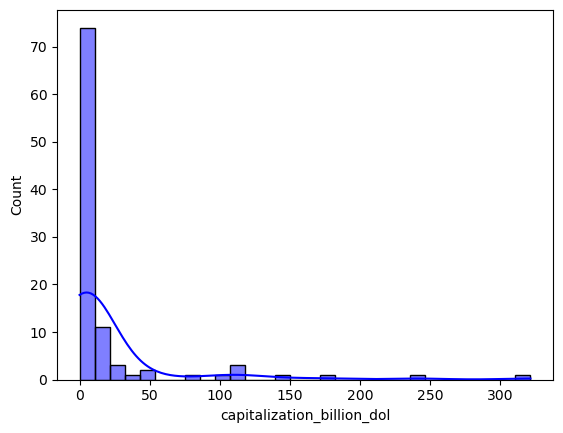

In [174]:

# analysis on numerical col, capitalization
from function_file import num_stats
num_stats(df_top100,'capitalization_billion_dol')

****** Brief analysis of country *****


country
United States    60
UK                7
Germany           6
France            4
Italy             4
Japan             4
Canada            3
Switzerland       2
Sweden            2
China             2
Spain             1
Australia         1
Finland           1
Belgium           1
Hong Kong         1
Austria           1
Name: count, dtype: int64

country
United States    0.60
UK               0.07
Germany          0.06
France           0.04
Italy            0.04
Japan            0.04
Canada           0.03
Switzerland      0.02
Sweden           0.02
China            0.02
Spain            0.01
Australia        0.01
Finland          0.01
Belgium          0.01
Hong Kong        0.01
Austria          0.01
Name: proportion, dtype: float64

'mode = 0    United States\nName: country, dtype: object'

NameError: name 'plt' is not defined

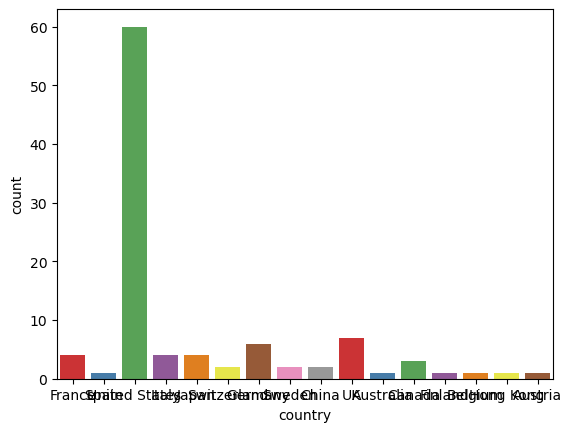

In [172]:
import matplotlib.pyplot as plt
#analysis on categorical col, country
from function_file import cat_stats

cat_stats (df_top100,'country')

In [175]:
df_top100

,position,country,company_name,capitalization_billion_dol
1,1,France,LVMH,321.6000
2,2,France,Hermès,240.7000
3,3,Spain,Inditex,177.0000
4,4,United States,TJX Companies,142.3000
5,5,United States,Nike,117.7000
...,...,...,...,...
96,96,Germany,Global Fashion Group,0.0576
97,97,Hong Kong,Esprit Holdings,0.0489
98,98,United States,Rent the Runway,0.0465
99,99,Austria,Wolford,0.0261


In [177]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/299.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 326.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 590.8 kB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 1.4 MB/s eta 0:00:00


VISUALIZATION & GRAPICS

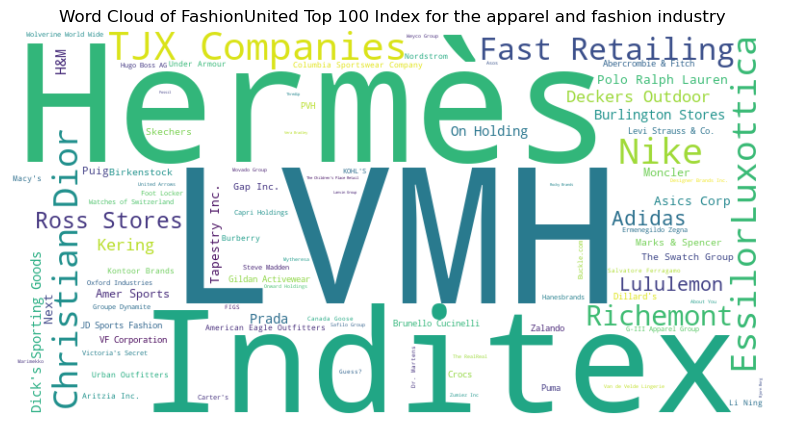

In [ ]:
from wordcloud import WordCloud

# Création d'un dictionnaire : clé = company_name, valeur = capitalization_billion_dol
frequencies = dict(zip(df_top100['company_name'], df_top100['capitalization_billion_dol']))

# Création du word cloud à partir des fréquences
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencies)

# Affichage du word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of FashionUnited Top 100 Index for the apparel and fashion industry ")
plt.show()

In [182]:
pip install squarify

  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/b7/3c/eedbe9fb07cc20fd9a8423da14b03bc270d0570b3ba9174a4497156a2152/squarify-0.4.4-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


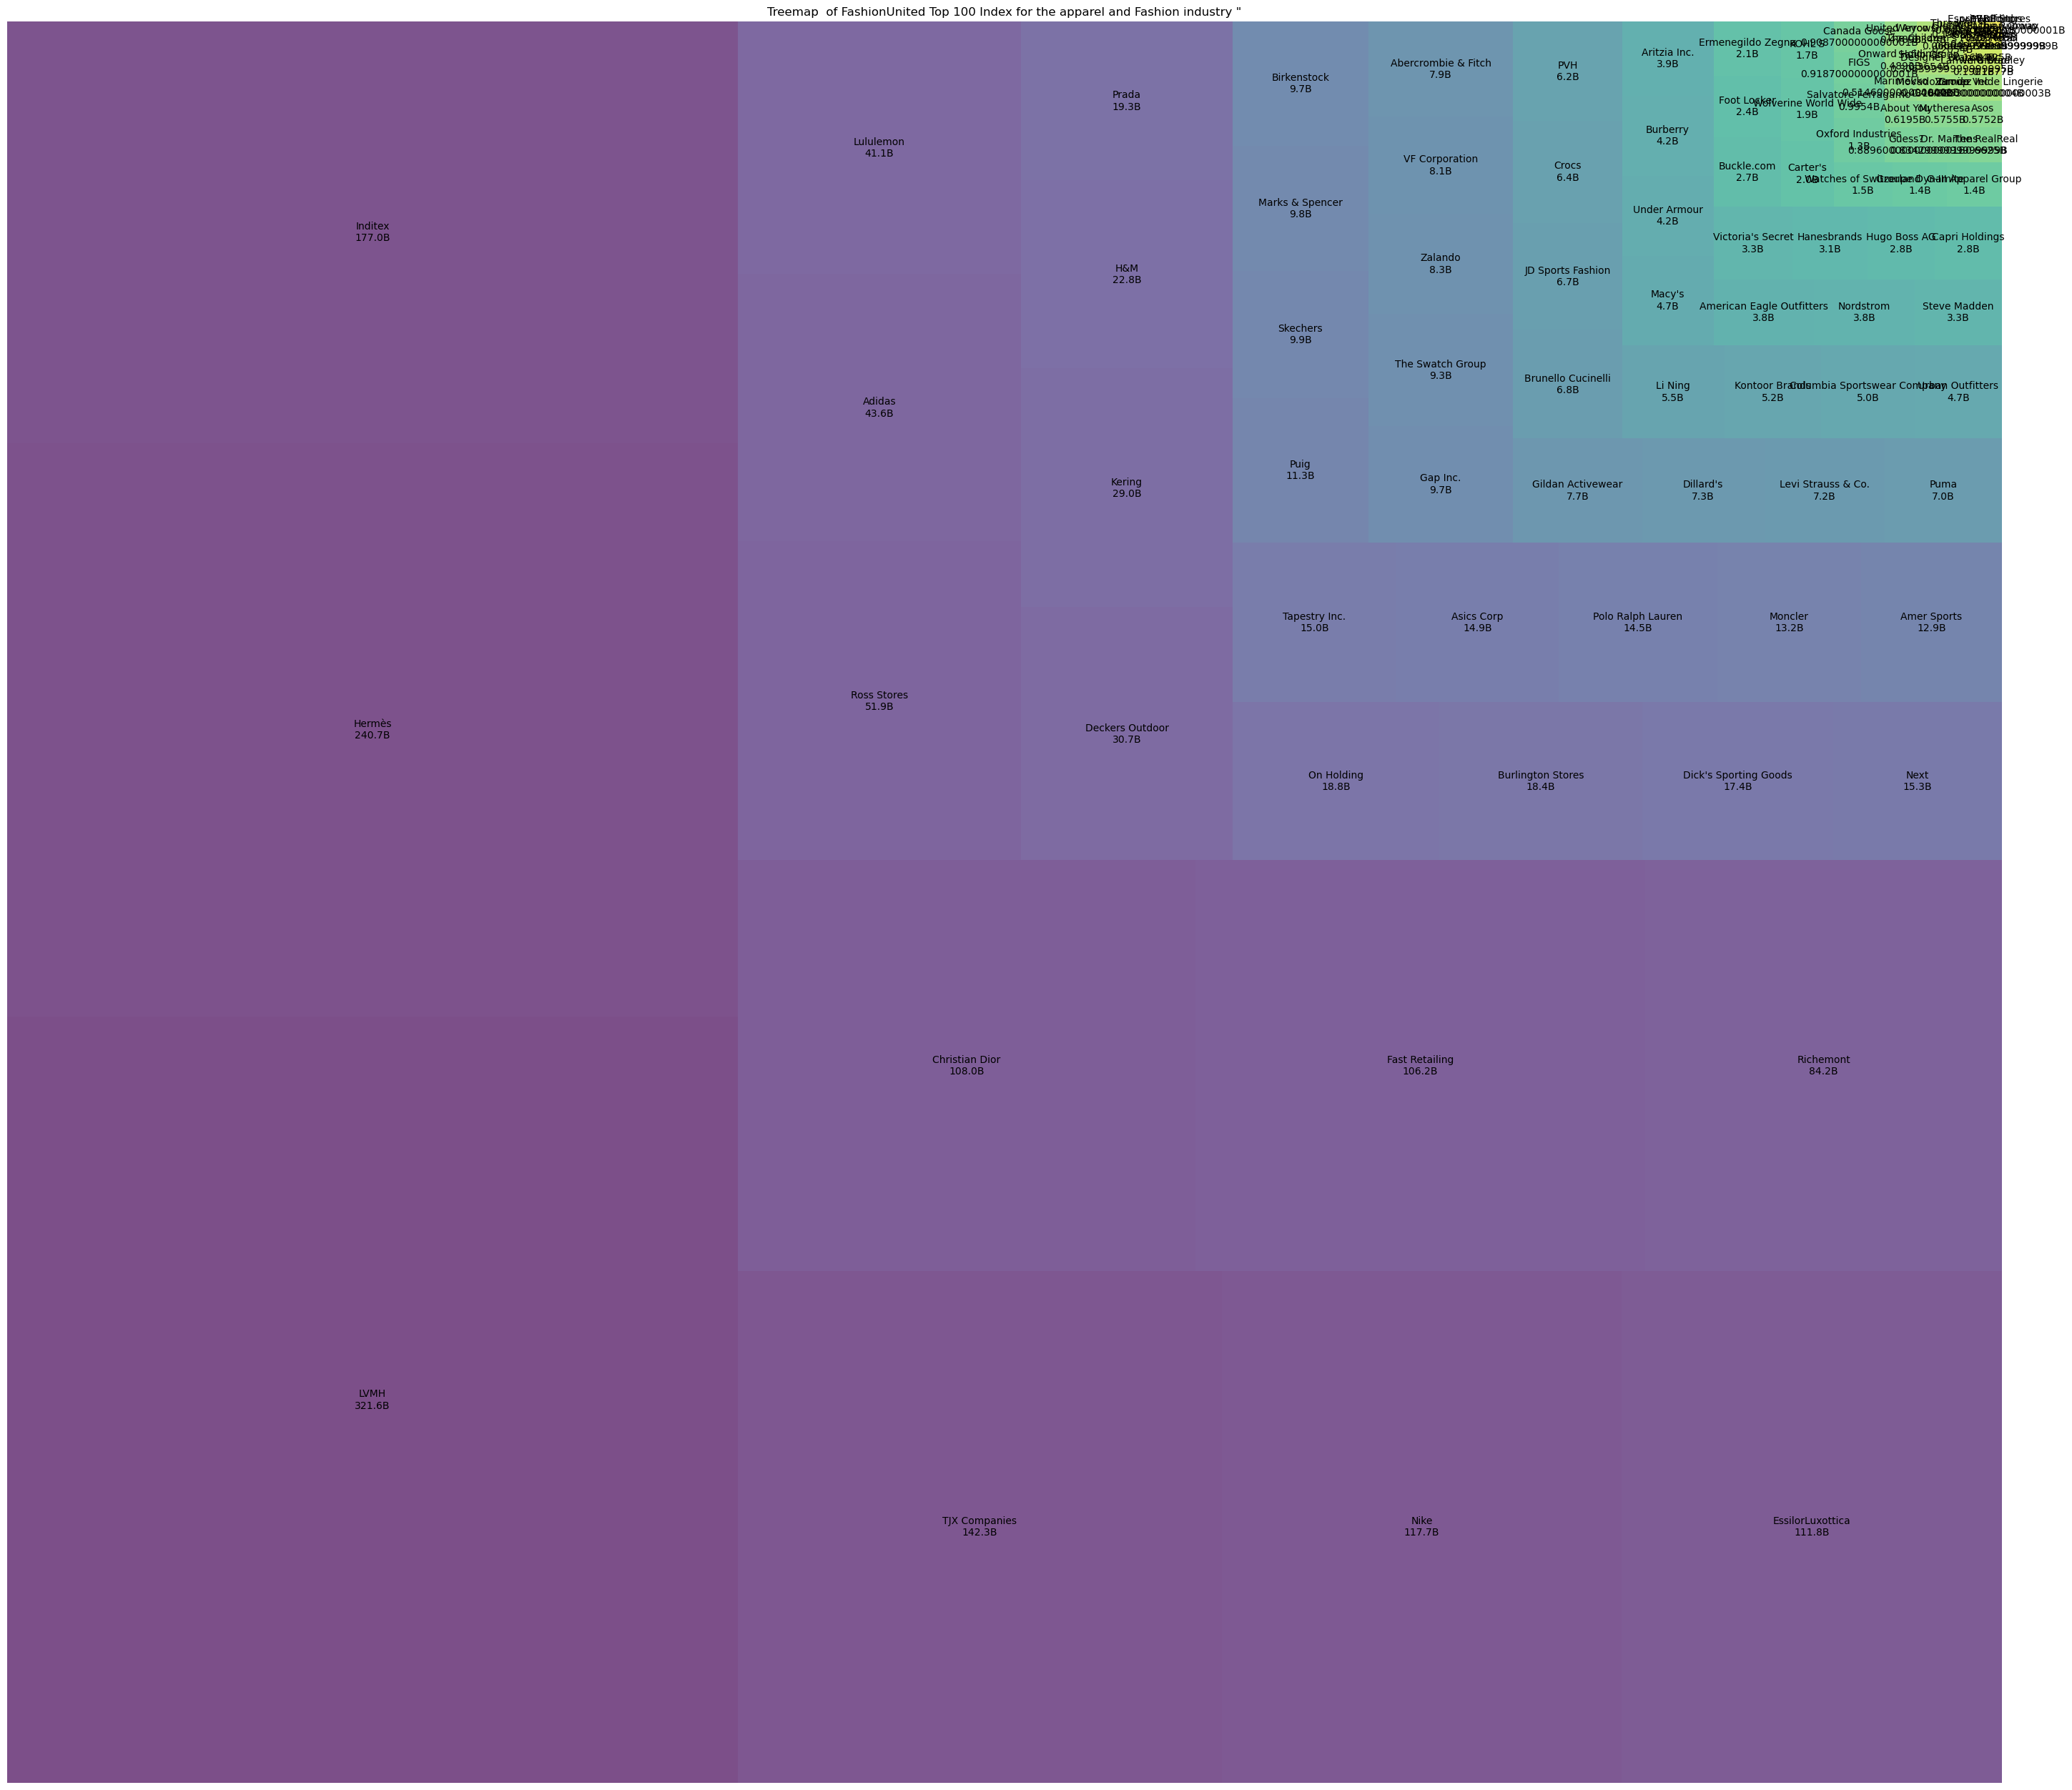

<Figure size 640x480 with 0 Axes>

In [ ]:
import squarify
labels = df_top100.apply(lambda x: f"{x['company_name']}\n{x['capitalization_billion_dol']}B", axis=1)
sizes = df_top100['capitalization_billion_dol']

plt.figure(figsize=(36, 32))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=sns.color_palette('viridis', len(sizes)))
plt.axis('off')
plt.title('Treemap  of FashionUnited Top 100 Index for the apparel and Fashion industry ')
plt.show()

# Optionnel : Modifier la couleur du fond pour mieux contraster le texte
ax.set_facecolor('dimgray')
plt.gcf().patch.set_facecolor('dimgray')

Vizualisation of categorical 

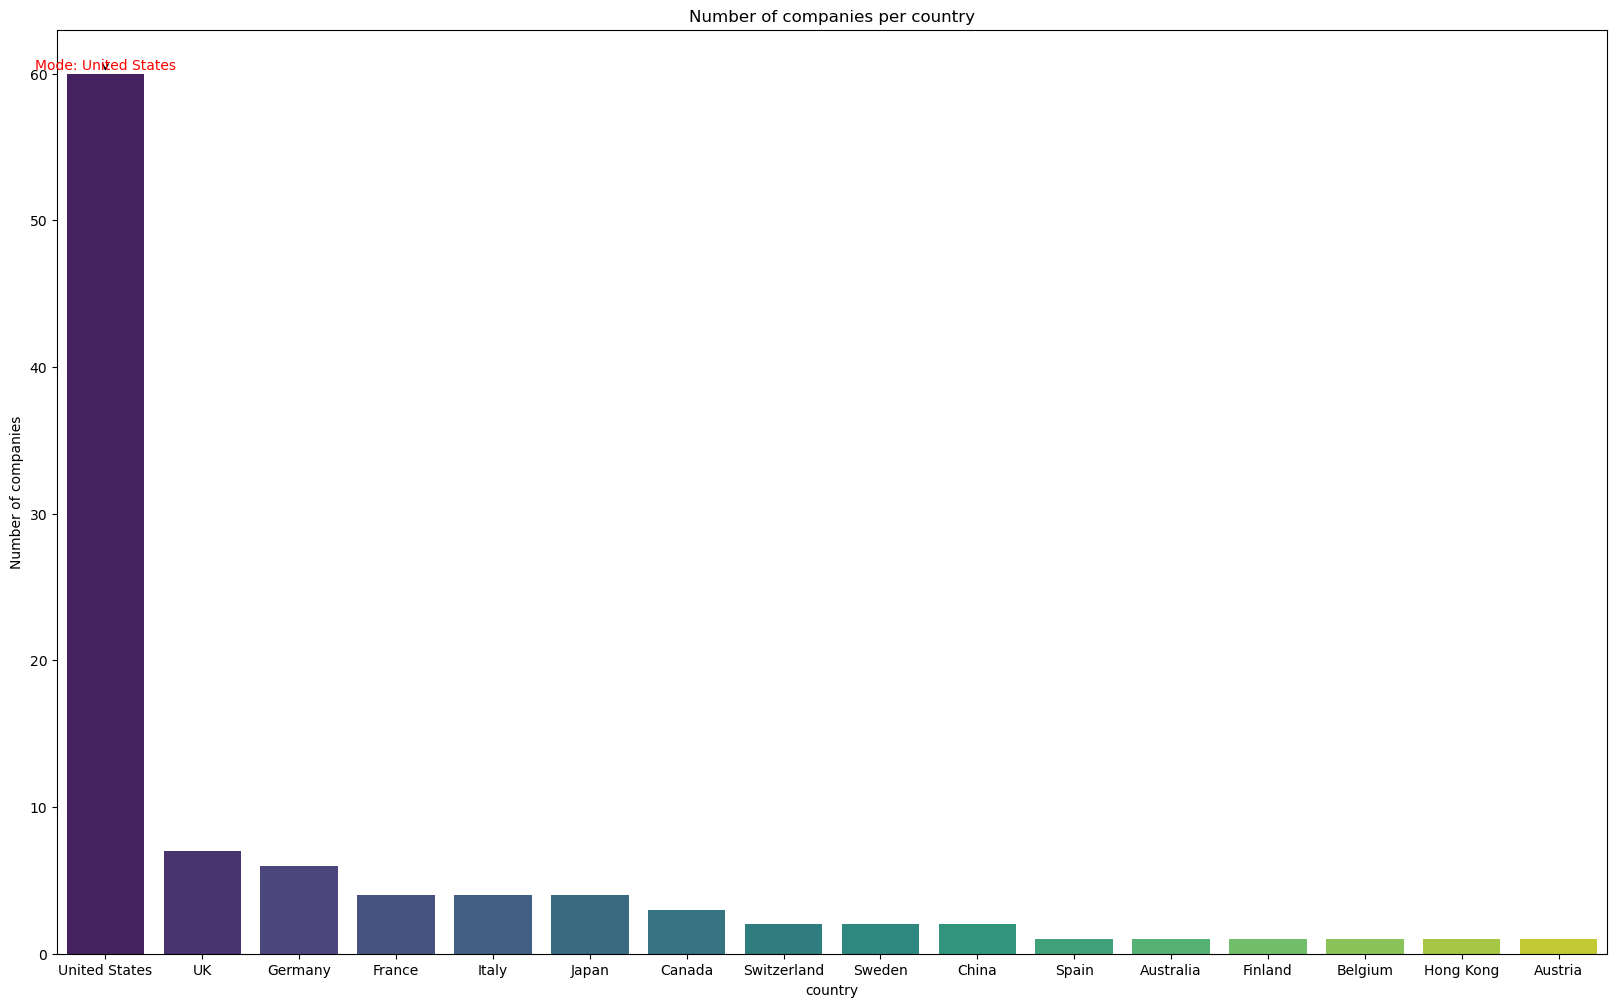

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des effectifs par pays
country_counts = df_top100['country'].value_counts()
mode_country = country_counts.idxmax()    # Le pays le plus fréquent
count_mode = country_counts.max()

# On définit l'ordre des catégories pour le graphique
order = country_counts.index.tolist()

plt.figure(figsize=(20,12))
ax = sns.countplot(x='country', data=df_top100, order=order, palette='viridis')

# Annotation sur le graphique pour mettre en évidence le mode
index_mode = order.index(mode_country)  # position de la barre correspondant au mode
ax.annotate("Mode: " + mode_country,
            xy=(index_mode, count_mode),
            xytext=(index_mode, count_mode + 0.3),
            arrowprops=dict(facecolor='black', arrowstyle="->"),
            ha='center', fontsize=10, color='red')

plt.title("Number of companies per country")
plt.xlabel("country")
plt.ylabel("Number of companies")
plt.show()


Numerical :Top 50

In [208]:

#selection top 50
df_top50 = df_top100.head(50)

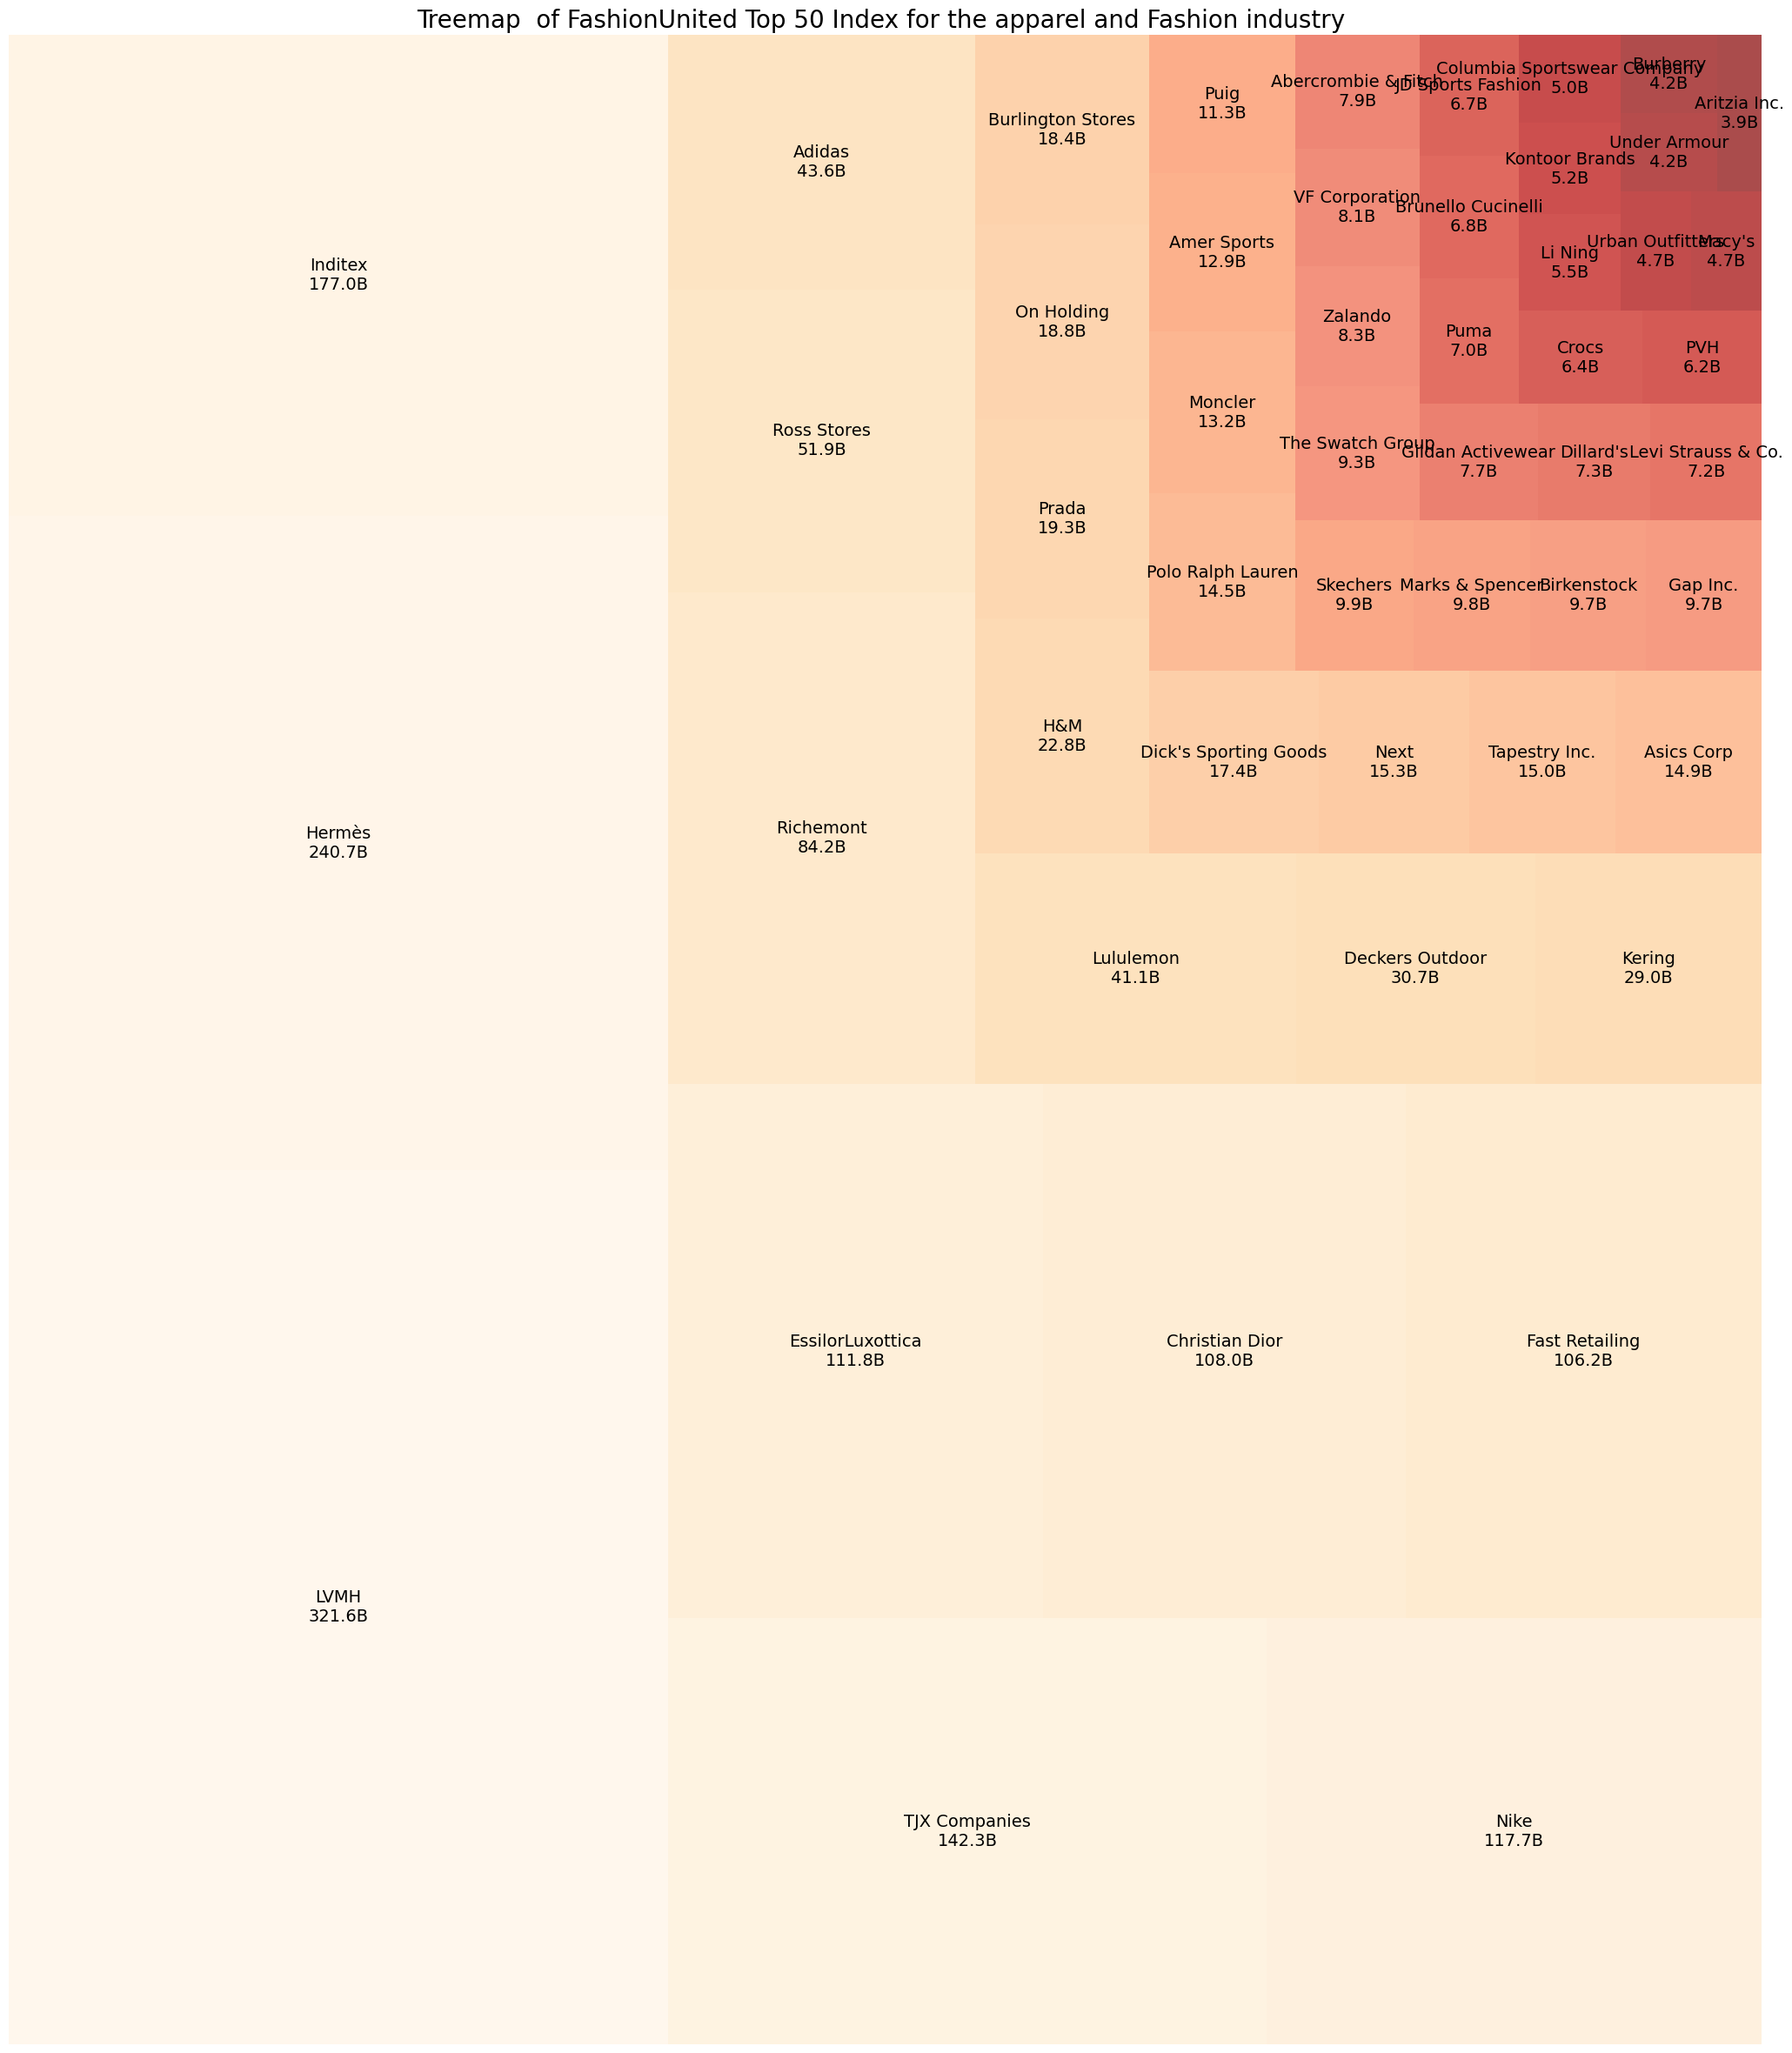

In [ ]:

# Préparation des labels et des tailles
labels = df_top50.apply(lambda x: f"{x['company_name']}\n{x['capitalization_billion_dol']}B", axis=1)
sizes = df_top50['capitalization_billion_dol']

# Création de la figure et du treemap
plt.figure(figsize=(26, 30))

squarify.plot(
    sizes=sizes,
    label=labels,
    alpha=0.7,
    color=sns.color_palette("OrRd", len(sizes)),
    text_kwargs={'color': 'black', 'fontsize': 14}  # Texte en blanc et taille 14
)

plt.axis('off')
plt.title('Treemap  of FashionUnited Top 50 Index for the apparel and Fashion industry ', color='black', fontsize=20)

plt.show()
